In [1]:
#!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

In [4]:
import torch 

# FOR WINDOWS: 
import pathlib
emp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

# Loading the model from Github
# model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt', force_reload=True) # downloads from Github

# Loading the model from Cache
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best3.pt', trust_repo=True) # loads from cache

Using cache found in C:\Users\aarus/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-9-26 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Quadro P620, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 1761871 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 


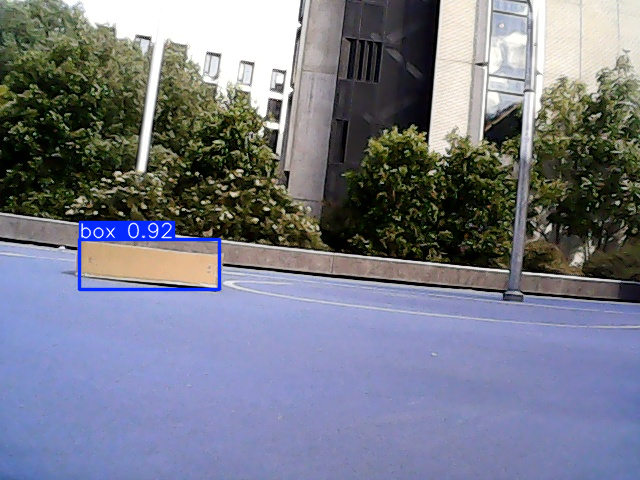

Saved 1 image to runs\detect\exp20


In [14]:
results = model('test_image/image_143.jpg')

# Display results
results.show()  # Show predictions
results.save()  # Save predictions to file

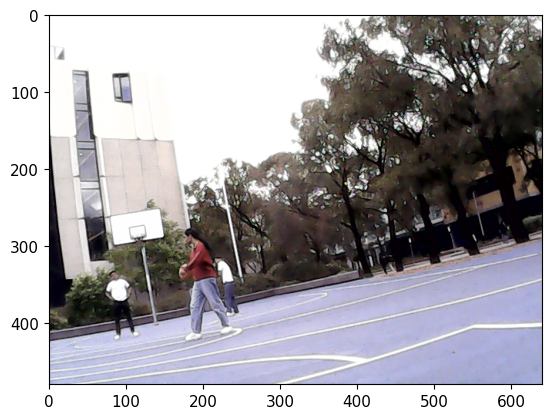

In [5]:
import cv2
import numpy as np
import time
import torch
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline


class TennisBallDetector:
    def __init__(self, model):
        # Load YOLOv5 model
        self.model = model
        # Initialize the camera
        self.camera = cv2.VideoCapture(0)  # Use 0 for the default camera on Raspberry Pi or adjust for other cameras
        
        if not self.camera.isOpened():
            print("Error: Could not open USB camera.")
            exit()

    def detect(self, retry=True, max_num_retries=20, retry_interval=1):
        counter = 0

        try:
            while True:
                # Capture frame from the camera
                ret, self.frame = self.camera.read()
                if not ret:
                    print("Error: Failed to capture image.")
                    if not retry or counter >= max_num_retries:
                        return False
                    counter += 1
                    time.sleep(retry_interval)
                    continue
    #             print("Image captured")
                # Run YOLOv5 object detection on the frame
                # results = self.model(self.frame)
                results = self.model(self.frame)  # adjust confidence as needed for better results

    #             print("Results generated")
                # Get the detected objects from YOLOv5
                detected_objects = results.pandas().xyxy[0]  # YOLO outputs pandas dataframe for bounding boxes

                # Draw detected objects on the frame
                for index, obj in detected_objects.iterrows():
                    # Get bounding box coordinates
                    x_min, y_min = int(obj['xmin']), int(obj['ymin'])
                    x_max, y_max = int(obj['xmax']), int(obj['ymax'])

                    # Draw bounding box and label
                    cv2.rectangle(self.frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
                    label = f"{obj['name']} {obj['confidence']:.2f}"
                    cv2.putText(self.frame, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                # Display the frame with bounding boxes
    #             print("Displaying image")
                frame_rgb = cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB)
                display.clear_output(wait=True)
                plt.figure()
                plt.imshow(frame_rgb)
                plt.show()


                # Break out of the loop if 'q' is pressed
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
                    
        except KeyboardInterrupt:
            pass
        except Exception as e:
            print(f"Error in detector.detect(). {e}")
        
        # Release camera and close windows
        self.camera.release()
        cv2.destroyAllWindows()

# Example usage. Remember to run the above cell that loads the model FIRST
detector = TennisBallDetector(model) # model is loaded in the above cell
    
detector.detect()
